<img src='TSF.png' align='center'></img>

<h1 align="center">Graduate Rotational Internship Programme</h1>
<h2 align="center">The Sparks Foundation</h2>

<h3>Data Science and Machine Learning</h3>
<h3>Task-2: To Explore Supervised Machine Learning</h3>

<h5>Importing Requisite Libraries</h5>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Joydip\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Setting appropriate dimensions for the plot
sb.set(rc={'figure.figsize':(11.7, 8.27)})

<h5>Importing the Dataset</h5>

Importing the dataset from the external source to our Python workspace

In [3]:
url="http://bit.ly/w-data"
stud=pd.read_csv(url)
stud.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h5>Analysing the Data (EDA)</h5>

Understanding the data a little better using statistics and visualisations

In [4]:
#Generating Statistical summary of the dataframe
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Retrieving the dimensions of the dataset
stud.shape

(25, 2)

In [6]:
#Gathering more information about the dataset
stud.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


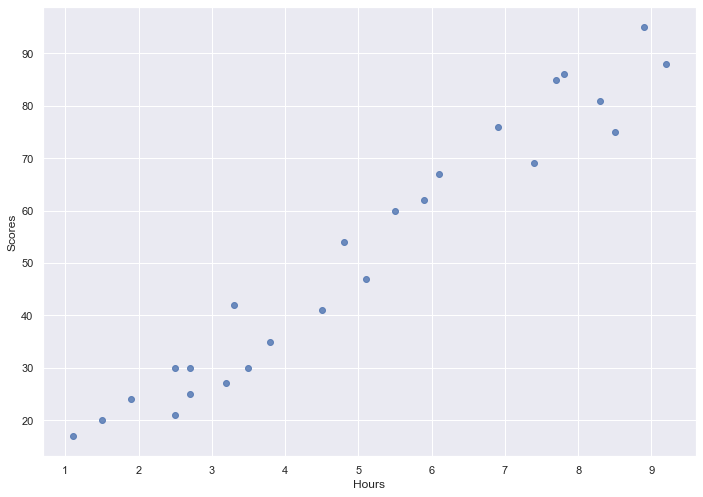

In [7]:
#Visualising the dataset: scatterplot
sb.regplot(x='Hours', y='Scores', scatter=True,
          fit_reg=False, data=stud)

In [8]:
#Understanding the Pearson correlation coefficient of the variables
stud.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


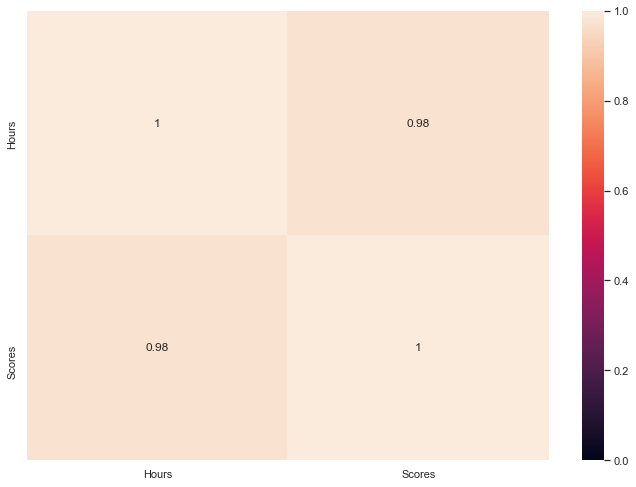

In [9]:
#Visualising the dataset: correlation heatmap
sb.heatmap(stud.corr(), vmin=0, vmax=1, annot=True)

C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


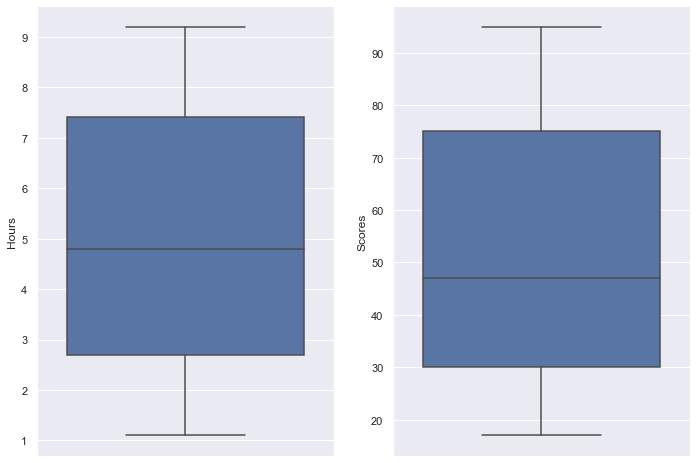

In [10]:
#Visualising the dataset: boxplots
fig, ax=plt.subplots(1, 2)
sb.boxplot(y=stud['Hours'], ax=ax[0])
sb.boxplot(y=stud['Scores'], ax=ax[1])
fig.show()

C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


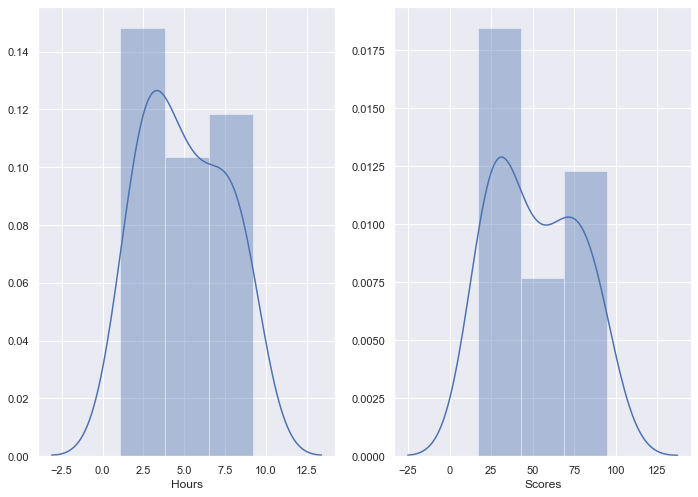

In [11]:
#Visualising the dataset: histogram
fig, ax=plt.subplots(1, 2)
sb.distplot(stud['Hours'], ax=ax[0])
sb.distplot(stud['Scores'], ax=ax[1])
fig.show()

<h5>Data Preprocessing</h5>

Preparing the data for modelling

In [12]:
#Isolating the variables in question
x=np.array(stud['Hours']).reshape(-1, 1)
y=np.array(stud['Scores'])

In [13]:
#Splitting the variables into training and test data
x_train, x_test, y_train, y_test=train_test_split(x, y,
                                                 test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17, 1) (8, 1) (17,) (8,)


<h5>Modelling and Training</h5>

Several regression models will be used for this problem

<i><u>Linear Regression</u></i>

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.<br>
<small>Source: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm</small>

In [20]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred1=lr.predict(x_test)

In [22]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R-squared:", metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 4.419727808027652
Root Mean Squared Error: 4.792191274636315
R-squared: 0.9568211104435257


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


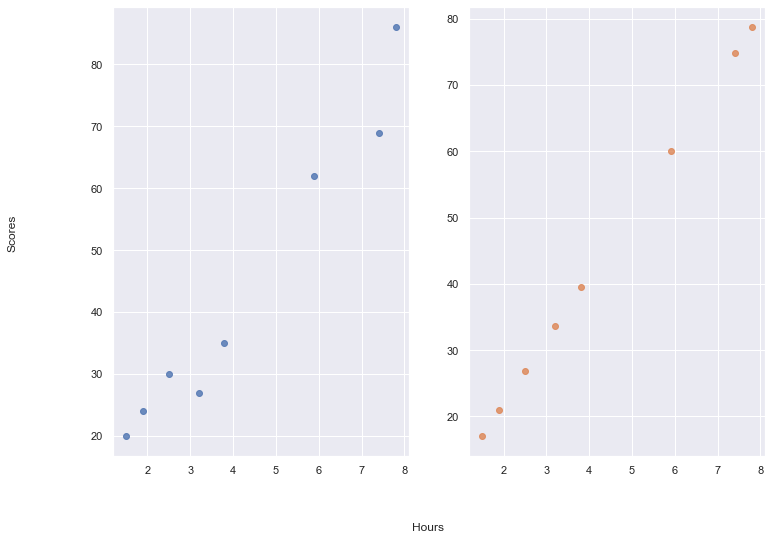

In [23]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred1, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i><u>Ridge Regression</u></i>

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.<br>
<small>Source: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf</small>

In [24]:
alpha={'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rr=Ridge()
ridge_models=GridSearchCV(rr, alpha)

In [25]:
ridge_models.fit(x_train, y_train)
best_fit1=ridge_models.best_estimator_
best_fit1

C:\Users\Joydip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
y_pred2=best_fit1.predict(x_test)

In [27]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R-squared:", metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 4.413183088034889
Root Mean Squared Error: 4.791663269135952
R-squared: 0.9568306248530701


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


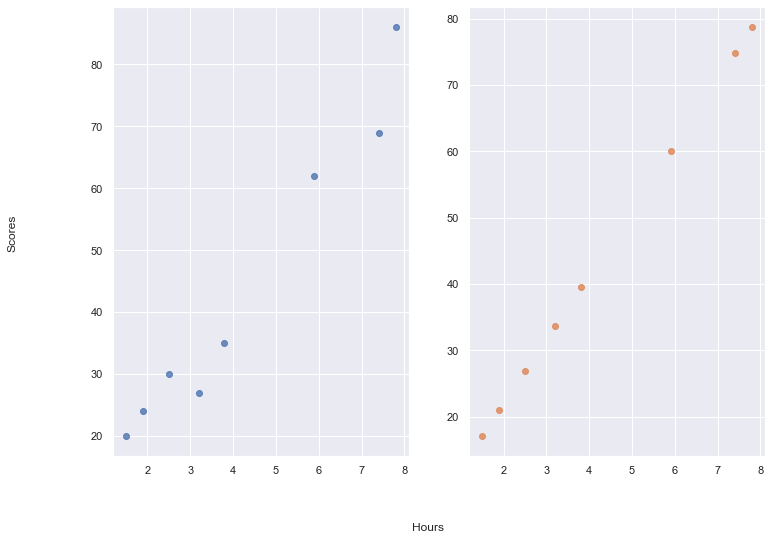

In [28]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred2, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i><u>Lasso Regression</u></i>

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is also well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.<br>
<small>Source: https://www.statisticshowto.com/lasso-regression/#:~:text=Lasso%20regression%20is%20a%20type,i.e.%20models%20with%20fewer%20parameters</small>

In [29]:
alpha={'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasr=Lasso()
lasso_models=GridSearchCV(lasr, alpha)

In [30]:
lasso_models.fit(x_train, y_train)
best_fit2=lasso_models.best_estimator_
best_fit2

C:\Users\Joydip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
y_pred3=best_fit2.predict(x_test)

In [32]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred3))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("R-squared:", metrics.r2_score(y_test, y_pred3))

Mean Absolute Error: 4.408350479135173
Root Mean Squared Error: 4.791352205193957
R-squared: 0.9568362295875352


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


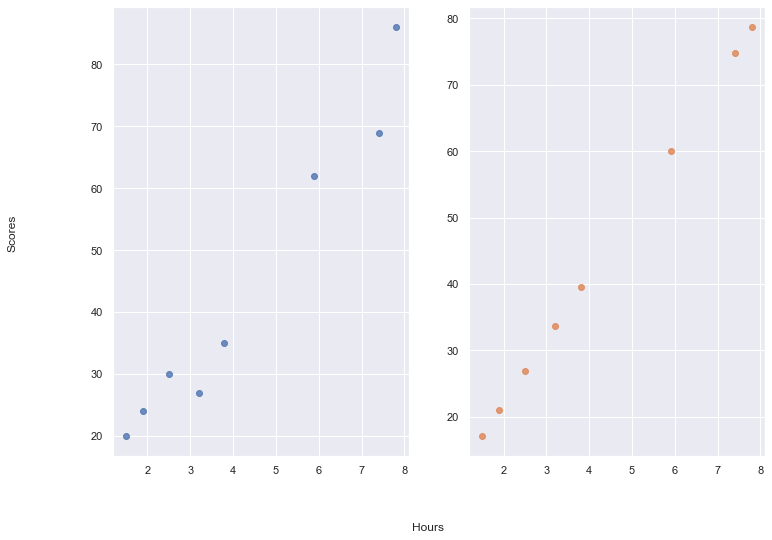

In [33]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred3, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i><u>Elastic Net Regression</u></i>

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve on the regularization of statistical models.<br>
<small>Source: https://corporatefinanceinstitute.com/resources/knowledge/other/elastic-net/</small>

In [34]:
alpha={'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
enr=ElasticNet()
en_models=GridSearchCV(enr, alpha)

In [35]:
en_models.fit(x_train, y_train)
best_fit3=en_models.best_estimator_
best_fit3

C:\Users\Joydip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
y_pred4=best_fit3.predict(x_test)

In [37]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred4))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R-squared:", metrics.r2_score(y_test, y_pred4))

Mean Absolute Error: 4.398386492728298
Root Mean Squared Error: 4.790922242803094
R-squared: 0.9568439760292174


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


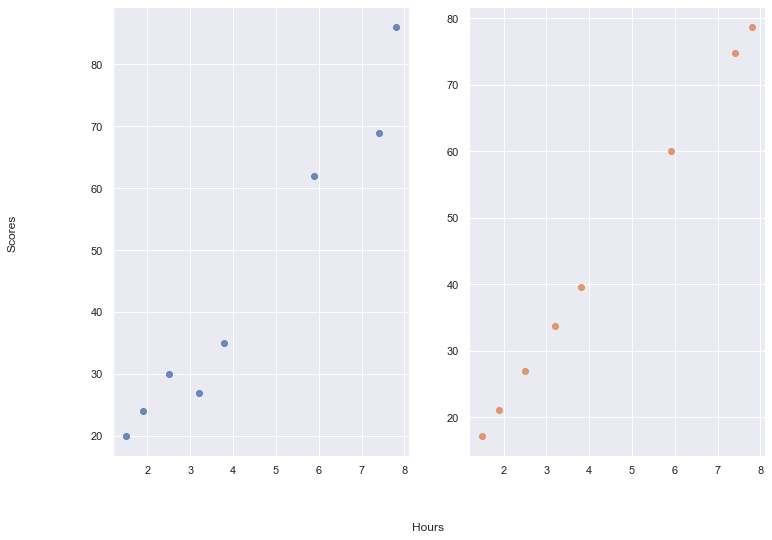

In [38]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred4, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i><u>Least Angle Regression (LARS)</u></i>

Least Angle Regression (LARS) relates to the classic model-selection method known as Forward Selection.<br>
<small>Source: http://statweb.stanford.edu/~tibs/ftp/lars.pdf</small>

In [14]:
alpha={'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
larr=LassoLars()
lars_models=GridSearchCV(larr, alpha)

In [15]:
lars_models.fit(x_train, y_train)
best_fit4=lars_models.best_estimator_
best_fit4

C:\Users\Joydip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LassoLars(alpha=0.01, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [16]:
y_pred5=best_fit4.predict(x_test)

In [17]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred5))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print("R-squared:", metrics.r2_score(y_test, y_pred5))

Mean Absolute Error: 4.408153351335913
Root Mean Squared Error: 4.7913409380357335
R-squared: 0.9568364325917972


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


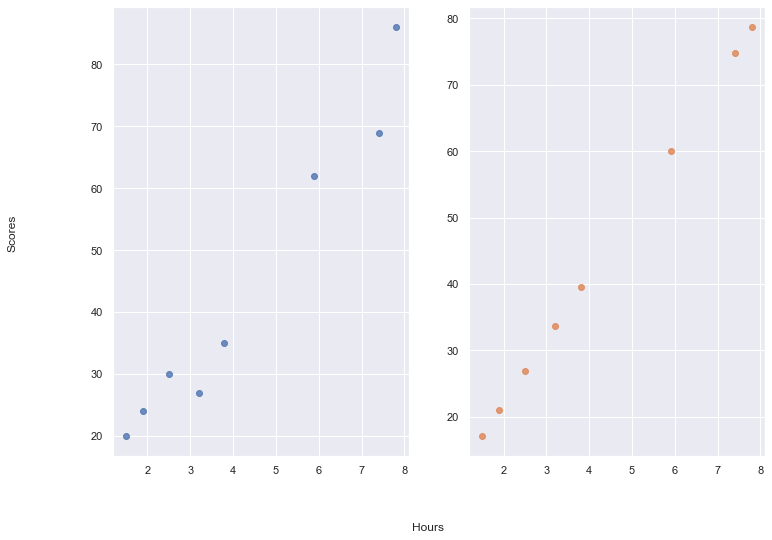

In [18]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred5, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i><u>Gradient Boosting Regression</u></i>

Gradient Boosting is an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.<br>
<small>Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html</small>

In [39]:
xgbr=XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
y_pred6=xgbr.predict(x_test)

In [41]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred6))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print("R-squared:", metrics.r2_score(y_test, y_pred6))

Mean Absolute Error: 7.124441623687744
Root Mean Squared Error: 8.880159652195525
R-squared: 0.8517329219805868


C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


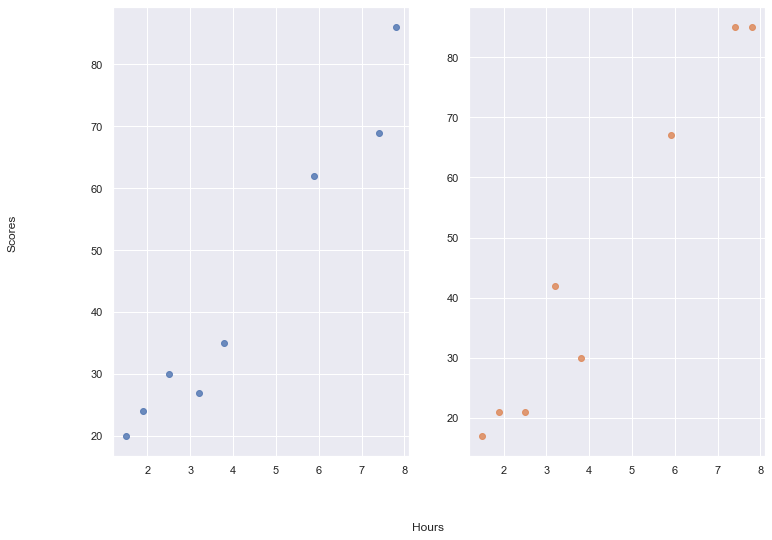

In [42]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred6, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

<i>and the best model is.....</i>

In [43]:
df=pd.DataFrame({'Regression Model':['Linear', 'Ridge', 'Lasso', 'Elastic Net', 'LARS', 'Gradient Boost'],
                'MAE':[metrics.mean_absolute_error(y_test, y_pred1),
                      metrics.mean_absolute_error(y_test, y_pred2),
                      metrics.mean_absolute_error(y_test, y_pred3),
                      metrics.mean_absolute_error(y_test, y_pred4),
                      metrics.mean_absolute_error(y_test, y_pred5),
                      metrics.mean_absolute_error(y_test, y_pred6)],
                'RMSE':[np.sqrt(metrics.mean_squared_error(y_test, y_pred1)),
                       np.sqrt(metrics.mean_squared_error(y_test, y_pred2)),
                       np.sqrt(metrics.mean_squared_error(y_test, y_pred3)),
                       np.sqrt(metrics.mean_squared_error(y_test, y_pred4)),
                       np.sqrt(metrics.mean_squared_error(y_test, y_pred5)),
                       np.sqrt(metrics.mean_squared_error(y_test, y_pred6))],
                'R-squared':[metrics.r2_score(y_test, y_pred1),
                            metrics.r2_score(y_test, y_pred2),
                            metrics.r2_score(y_test, y_pred3),
                            metrics.r2_score(y_test, y_pred4),
                            metrics.r2_score(y_test, y_pred5),
                            metrics.r2_score(y_test, y_pred6)]})
df

,Regression Model,MAE,RMSE,R-squared
0,Linear,4.419728,4.792191,0.956821
1,Ridge,4.413183,4.791663,0.956831
2,Lasso,4.408350,4.791352,0.956836
3,Elastic Net,4.398386,4.790922,0.956844
4,LARS,4.408153,4.791341,0.956836
5,Gradient Boost,7.124442,8.880160,0.851733


In [44]:
df[df.MAE==df.MAE.min()]

,Regression Model,MAE,RMSE,R-squared
3,Elastic Net,4.398386,4.790922,0.956844


In [45]:
df[df.RMSE==df.RMSE.min()]

,Regression Model,MAE,RMSE,R-squared
3,Elastic Net,4.398386,4.790922,0.956844


In [47]:
df[df['R-squared']==df['R-squared'].max()]

,Regression Model,MAE,RMSE,R-squared
3,Elastic Net,4.398386,4.790922,0.956844


<i>...Elastic Net Regressor!!</i>

<h5>Predictions for required feature using the best model</h5>

In [54]:
pred=best_fit3.predict(np.array(9.25).reshape(-1, 1))
print("The predicted score of the student who studied 9.25 hours a day is: {}" 
      .format(pred[0]))

The predicted score of the student who studied 9.25 hours a day is: 92.7955277448349


In [55]:
#Other inputs yield their respective outputs
hrs=float(input("How long do you study each day? "))
pred=best_fit3.predict(np.array(hrs).reshape(-1, 1))
print("The predicted score of the student who studied", hrs, "hours a day is: {}" 
      .format(pred[0]))

How long do you study each day? 9
The predicted score of the student who studied 9.0 hours a day is: 90.3560888833406


<h5>Final Thoughts</h5>

The Elastic Net Regressor is a culmination of the penalties of both Ridge and Lasso Regressors, which resulted in a higher R<sup>2</sup> value. This regressor was useful for this cause, as the dataset was small. For a larger dataset, however, Gradient Boosting might be required.<br><br>
Using the aforementioned model, the predicted score for a student studying 9.25 hours a day is approximately <em>92.80</em>